In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
hmm_result = pd.read_csv("../../data/hmm_result_transition_prob.csv",index_col=0)
hmm_result.index = pd.to_datetime(hmm_result.index)
hmm_result= hmm_result.sort_index()
hmm_result.head()

,result_5,result_10,pca_0,pca_1,pca_2,pca_3,pca_4,contago,contago_next,status_change,result_10_ma
Date,,,,,,,,,,,
2010-01-04,0.018580,0.036814,-1.830907,0.382434,-0.192033,0.147659,0.017821,1,1.0,0,NaN
2010-01-05,0.019986,0.039573,-1.866690,0.451625,-0.177086,0.143731,0.003736,1,1.0,0,NaN
2010-01-06,0.032899,0.064715,-1.879853,0.498008,-0.169401,0.134899,0.012458,1,1.0,0,NaN
2010-01-07,0.018552,0.036759,-1.773892,0.588306,-0.118133,0.142016,0.001638,1,1.0,0,NaN
2010-01-08,0.027901,0.055024,-1.889454,0.525677,-0.130560,0.119336,0.002078,1,1.0,0,0.046577


<AxesSubplot: xlabel='Date'>

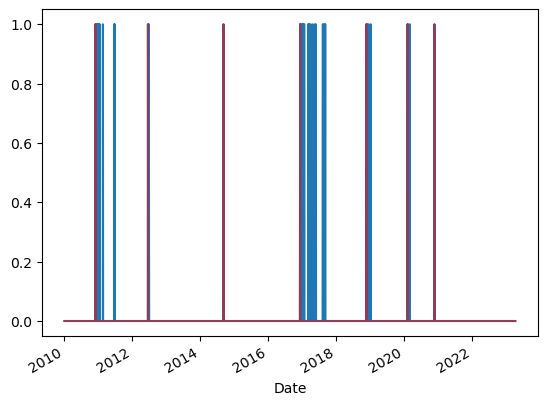

In [107]:
check_avg = pd.Series(hmm_result[hmm_result["status_change"].diff() != 0].index)
trans_dates = check_avg[check_avg.diff().dt.days>180]

hmm_result["status_change_new"] = (hmm_result.index.isin(trans_dates)).astype("int")

hmm_result["status_change"].plot()
hmm_result["status_change_new"].plot(color="red",alpha=0.5)

### 5 day result

In [149]:
hmm_result["trans_5_ma"] = hmm_result["result_5"].rolling(20).mean()
hmm_result["trans_5_ma_150"] = hmm_result["result_5"].rolling(150).mean()
hmm_result["trans_5_ma_300"] = hmm_result["result_5"].rolling(300).mean()

hmm_result["trans_10_ma"] = hmm_result["result_10"].rolling(10).mean()

hmm_result.groupby(["status_change_new"])[["trans_5_ma","trans_5_ma_180","trans_5_ma_300"]].mean()

,trans_5_ma,trans_5_ma_180,trans_5_ma_300
status_change_new,,,
0,0.026367,0.026341,0.026054
1,0.029559,0.025879,0.025901


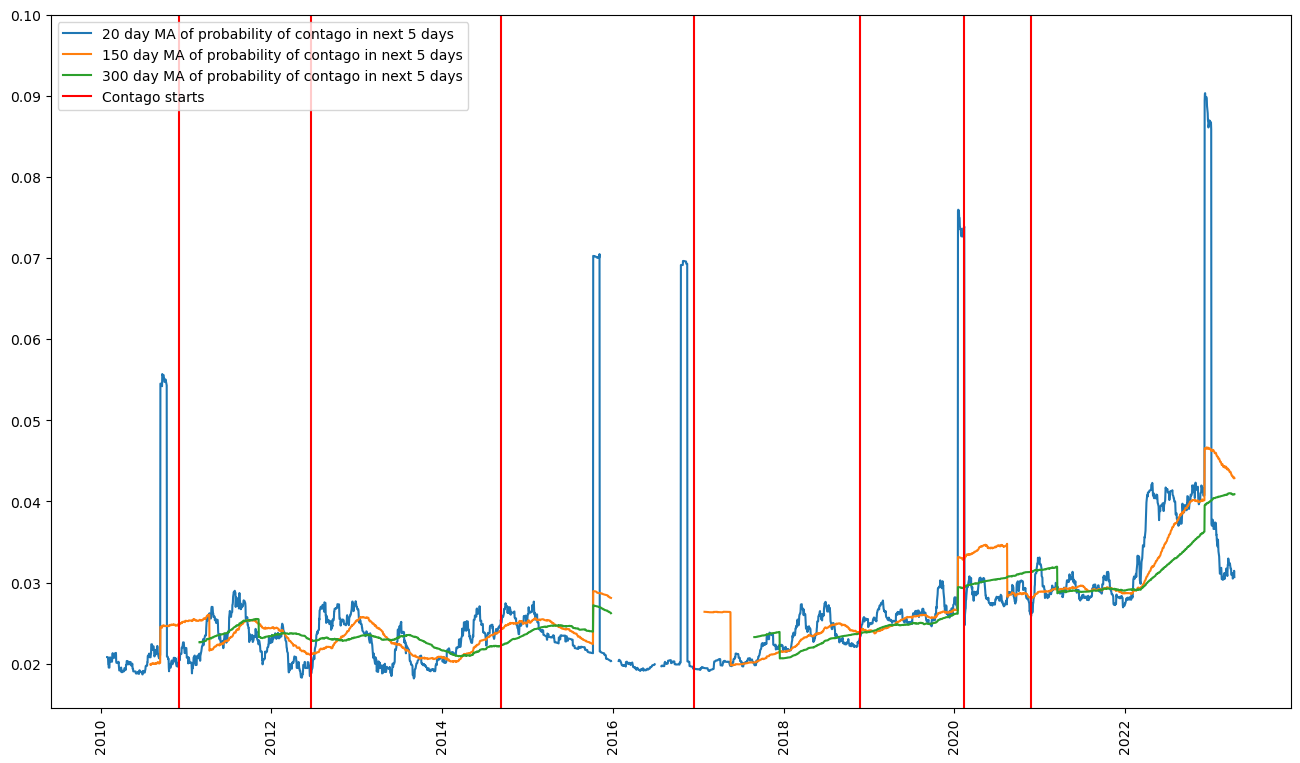

In [153]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plt.plot(hmm_result['trans_5_ma'],label="20 day MA of probability of contago in next 5 days")
plt.plot(hmm_result['trans_5_ma_150'],label="150 day MA of probability of contago in next 5 days")
plt.plot(hmm_result['trans_5_ma_300'],label="300 day MA of probability of contago in next 5 days")
# plt.plot(hmm_result['trans_10_ma'],label="10 day MA of probability to transit in next 10 days")
# plt.plot(hmm_result['result_10'],label="10 day trans")
#plt.plot(result_df['result_10'],label="10 day trans")
for i,t in enumerate(trans_dates):
    if i==len(trans_dates)-1:
        ax.axvline(t,color="red",alpha=1.0, label = "Contago starts")
    else:
        ax.axvline(t,color="red",alpha=1.0)
plt.xticks(rotation='vertical')
ax.set_ylim(top=0.1)
plt.legend()

### 10 day result

In [151]:
hmm_result["trans_10_ma"] = hmm_result["result_5"].rolling(20).mean()
hmm_result["trans_10_ma_150"] = hmm_result["result_5"].rolling(150).mean()
hmm_result["trans_10_ma_300"] = hmm_result["result_5"].rolling(300).mean()


hmm_result.groupby(["status_change_new"])[["trans_10_ma","trans_10_ma_150","trans_10_ma_300"]].mean()

,trans_10_ma,trans_10_ma_150,trans_10_ma_300
status_change_new,,,
0,0.026367,0.026341,0.026054
1,0.029559,0.025879,0.025901


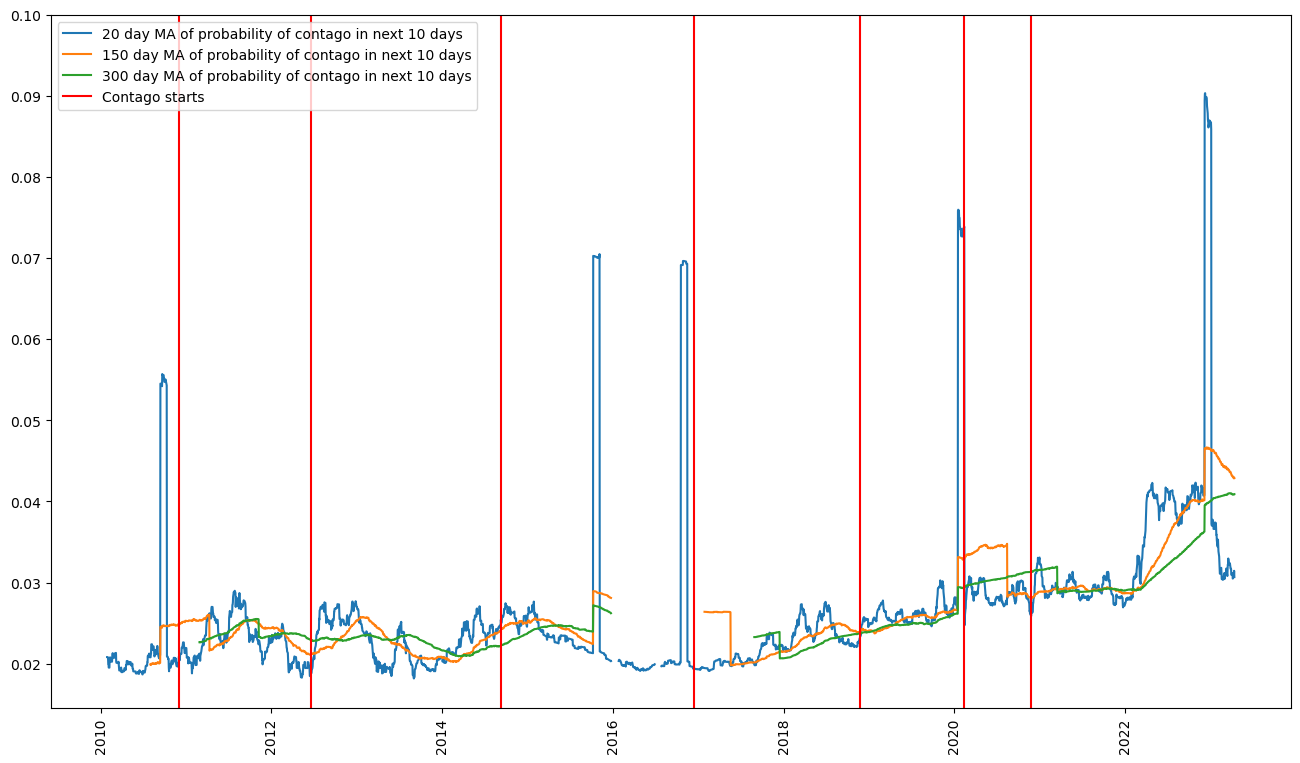

In [154]:
fig,ax=plt.subplots(1,1,figsize=(16,9))
plt.plot(hmm_result['trans_10_ma'],label="20 day MA of probability of contago in next 10 days")
plt.plot(hmm_result['trans_10_ma_150'],label="150 day MA of probability of contago in next 10 days")
plt.plot(hmm_result['trans_10_ma_300'],label="300 day MA of probability of contago in next 10 days")
# plt.plot(hmm_result['trans_10_ma'],label="10 day MA of probability to transit in next 10 days")
# plt.plot(hmm_result['result_10'],label="10 day trans")
#plt.plot(result_df['result_10'],label="10 day trans")
for i,t in enumerate(trans_dates):
    if i==len(trans_dates)-1:
        ax.axvline(t,color="red",alpha=1.0, label = "Contago starts")
    else:
        ax.axvline(t,color="red",alpha=1.0)
plt.xticks(rotation='vertical')
ax.set_ylim(top=0.1)
plt.legend()